# Feature Extraction

In [6]:
from IPython.display import Image 
%matplotlib inline

```
Note: Feature extraction is very different from Feature selection: the former consists in transforming arbitrary data, such as text or images, into numerical features usable for machine learning. The latter is a machine learning technique applied on these features. 
```

De la documentación de Sklearn.

Hoy veremos tres distintos dos(tres) distintos frentes en los que podremos enfrentarnos con procesamiento de un dato dificil de trabajar a una representación más sencilla modelable.
- Texto
- Imagenes
- (Audio)

## Texto: Procesamiento del Lenguaje Natural

¿En qué aplicaciones crees que se usa el procesamiento de texto para arrojar un resultado?

¿Qué es el procesamiento del Lenguaje Natural?

- Es una subrama de la inteligencia artificial
- Es un tema multidisciplinario
- Está hecho para interactuar con humanos.

El ** Lenguaje Natural** es el lenguaje hablado por personas, más allá de los lenguajes de programación o estructurados. El procesamiento de lenguaje natural, es el conjunto de herramientas teóricas que permiten analizarlo, representarlo y modelarlo a niveles cercanos a la intención humana

http://www.slideshare.net/jaganadhg/natural-language-processing-14660849

In [3]:
import nltk

In [2]:
#vamos a bajar el dataset de libros de nltk. 
#Cuidado, esto abrirá una ventana:
nltk.download()
#Cuando termines, sal del descargador con la q.

showing info http://www.nltk.org/nltk_data/


True

In [3]:
from nltk.book import text4

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


len(text4)

In [5]:
# Ejercicio: Toma las primeras 100 palabras en text4, y filtra solo 
# aquellas que tengan 8 letras y una g.
# Cuidado, text4 son mas de 140000 palabras.

In [6]:
#Buscar palabra en el texto, con contexto
text4.concordance("America")

Displaying 25 of 192 matches:
posed in me by the people of united America . Previous to the execution of any 
y times , that no middle course for America remained between unlimited submissi
this dangerous crisis the people of America were not abandoned by their usual g
ay be exposed ) which the people of America have exhibited to the admiration an
ty toward the aboriginal nations of America , and a disposition to meliorate th
onor and integrity of the people of America and the internal sentiment of their
een Spain and the colonies in South America , which had commenced many years be
 Britannic Majesty ' s dominions in America , with other differences on importa
 generations yet to come , and that America will present to every friend of man
route across the isthmus of Central America . It is impossible to conceive that
thmus that connects North and South America as will protect our national intere
, in the Philippines , and in South America are known to everyone who has given
of steamer

In [7]:
#Buscar palabra en contextos similares
text4.similar("citizen")

people states executive world constitution union government time
president power future right effort nation man country one law past
duties


In [8]:
#Examinar solo los contextos compartidos por dos o más palabras
text4.common_contexts(["war", "freedom"])


of_but of_we of_have of_and the_to of_the the_and of_of for_we of_s
in_and that_is of_may the_the of_citizens of_to of_that of_in the_of


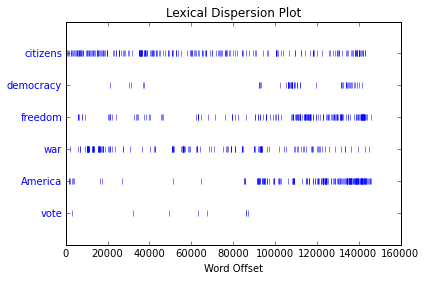

In [9]:
# ¿Qué tan al principio aparecen un par de palabras?
import numpy, matplotlib
from nltk.draw.dispersion import dispersion_plot
dispersion_plot(text4, ["citizens", "democracy", "freedom", "war", "America", "vote"])

In [10]:
# Contar todas las palabbras
len(text4)

145735

In [12]:
#Contar occurencias de una palabra
text4.count("democracy")

52

In [13]:
#plabras únicas:
len(set(text4))

9754

In [15]:
#¿Qué hace esta función?
len(set(text4))/len(text4)

0.06692970116993173

In [24]:
# Frecuencia de menciones de palabras
from nltk import FreqDist
fdist1 = FreqDist(text4)
vocabulary1 = fdist1.keys() 
list(vocabulary1)[:10] #obtener las primeras 10

['wanting',
 'earn',
 'recommend',
 'fabric',
 'ranges',
 'display',
 'Moreover',
 'specifically',
 'teachings',
 'savor']

In [4]:
# Palabras que ocurren una sola vez
from nltk import FreqDist
fdist1 = FreqDist(text4)
fdist1.hapaxes()[:20]

['ignore',
 'dispose',
 'specifically',
 'chattel',
 'brink',
 'Disease',
 'redounds',
 'King',
 'Depression',
 'committing',
 'Envy',
 'husband',
 'alienation',
 'omission',
 'paved',
 '1945',
 'unpreparedness',
 'Archibald',
 'prevalence',
 'detained']

In [ ]:
# Palbabras que siguen una condicion. ¿Como filtrarias palabras de más de 15 letras?
V = set(text4)
long_words = [w for w in V if ]
sorted(long_words)

In [5]:
# Palabras que caracterizan un texto. (Largas y repetidas)
fdist = FreqDist(text4)
sorted([w for w in set(text4) if len(w) > 12 and fdist[w] > 7])

['Administration',
 'accountability',
 'administration',
 'circumstances',
 'consciousness',
 'consideration',
 'considerations',
 'constitutional',
 'controversies',
 'determination',
 'distinguished',
 'encouragement',
 'establishment',
 'extraordinary',
 'fortifications',
 'indispensable',
 'international',
 'opportunities',
 'participation',
 'recommendations',
 'representative',
 'representatives',
 'responsibilities',
 'responsibility',
 'righteousness',
 'understanding']

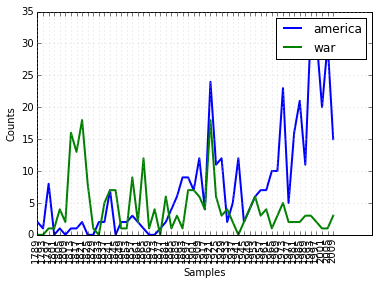

In [8]:
# ¿Cómo se usan en el tiempo las palabras ameriza y citizen en el
# documento de inaugural
import nltk
from nltk.corpus import inaugural
inaugural.fileids()[:2]
[fileid[:4] for fileid in inaugural.fileids()] # Get the first 4 characters of the file IDs
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'war']
    if w.lower().startswith(target))
cfd.plot()

In [9]:
# Stopwords: Palabras que no contribuyen al valor del texto
from nltk.corpus import stopwords
stopwords.words('english')
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)
print(content_fraction(nltk.corpus.inaugural.words()))

0.5228599855902837


In [43]:
# Procesando un texto en linea.
# Dividiendo en Tokens
from urllib.request import urlopen
from bs4 import BeautifulSoup

url="http://shakespeare.mit.edu/hamlet/full.html"
html = urlopen(url).read()    
soup = BeautifulSoup(html)
raw = soup.find("body").text
print(raw[:2000])
tokens = nltk.word_tokenize(raw)
type(tokens)
tokens[50:70]



The Tragedy of Hamlet, Prince of Denmark

Shakespeare homepage 
    | Hamlet 
    | Entire play

ACT I
SCENE I. Elsinore. A platform before the castle.

FRANCISCO at his post. Enter to him BERNARDO

BERNARDO

Who's there?

FRANCISCO

Nay, answer me: stand, and unfold yourself.

BERNARDO

Long live the king!

FRANCISCO

Bernardo?

BERNARDO

He.

FRANCISCO

You come most carefully upon your hour.

BERNARDO

'Tis now struck twelve; get thee to bed, Francisco.

FRANCISCO

For this relief much thanks: 'tis bitter cold,
And I am sick at heart.

BERNARDO

Have you had quiet guard?

FRANCISCO

Not a mouse stirring.

BERNARDO

Well, good night.
If you do meet Horatio and Marcellus,
The rivals of my watch, bid them make haste.

FRANCISCO

I think I hear them. Stand, ho! Who's there?
Enter HORATIO and MARCELLUS

HORATIO

Friends to this ground.

MARCELLUS

And liegemen to the Dane.

FRANCISCO

Give you good night.

MARCELLUS

O, farewell, honest soldier:
Who hath relieved you?

FRANCISCO

Berna

['unfold',
 'yourself',
 '.',
 'BERNARDO',
 'Long',
 'live',
 'the',
 'king',
 '!',
 'FRANCISCO',
 'Bernardo',
 '?',
 'BERNARDO',
 'He',
 '.',
 'FRANCISCO',
 'You',
 'come',
 'most',
 'carefully']

In [44]:
# A veces, es también interesante observar el comportamiento de ngramas.
# Los ngramas, son las combinaciones de tokens:  combinaciones de dos palabras
# se llaman bigramas; de 3, trigramas. etc.
from nltk.util import ngrams
bigrams = ngrams(raw.split(), 2)
for grams in bigrams:
    print(grams)


('The', 'Tragedy')
('Tragedy', 'of')
('of', 'Hamlet,')
('Hamlet,', 'Prince')
('Prince', 'of')
('of', 'Denmark')
('Denmark', 'Shakespeare')
('Shakespeare', 'homepage')
('homepage', '|')
('|', 'Hamlet')
('Hamlet', '|')
('|', 'Entire')
('Entire', 'play')
('play', 'ACT')
('ACT', 'I')
('I', 'SCENE')
('SCENE', 'I.')
('I.', 'Elsinore.')
('Elsinore.', 'A')
('A', 'platform')
('platform', 'before')
('before', 'the')
('the', 'castle.')
('castle.', 'FRANCISCO')
('FRANCISCO', 'at')
('at', 'his')
('his', 'post.')
('post.', 'Enter')
('Enter', 'to')
('to', 'him')
('him', 'BERNARDO')
('BERNARDO', 'BERNARDO')
('BERNARDO', "Who's")
("Who's", 'there?')
('there?', 'FRANCISCO')
('FRANCISCO', 'Nay,')
('Nay,', 'answer')
('answer', 'me:')
('me:', 'stand,')
('stand,', 'and')
('and', 'unfold')
('unfold', 'yourself.')
('yourself.', 'BERNARDO')
('BERNARDO', 'Long')
('Long', 'live')
('live', 'the')
('the', 'king!')
('king!', 'FRANCISCO')
('FRANCISCO', 'Bernardo?')
('Bernardo?', 'BERNARDO')
('BERNARDO', 'He.')
('He.

In [45]:
from nltk.util import ngrams
bigrams = ngrams(raw.split(), 3)
for grams in bigrams:
    print(grams)

('The', 'Tragedy', 'of')
('Tragedy', 'of', 'Hamlet,')
('of', 'Hamlet,', 'Prince')
('Hamlet,', 'Prince', 'of')
('Prince', 'of', 'Denmark')
('of', 'Denmark', 'Shakespeare')
('Denmark', 'Shakespeare', 'homepage')
('Shakespeare', 'homepage', '|')
('homepage', '|', 'Hamlet')
('|', 'Hamlet', '|')
('Hamlet', '|', 'Entire')
('|', 'Entire', 'play')
('Entire', 'play', 'ACT')
('play', 'ACT', 'I')
('ACT', 'I', 'SCENE')
('I', 'SCENE', 'I.')
('SCENE', 'I.', 'Elsinore.')
('I.', 'Elsinore.', 'A')
('Elsinore.', 'A', 'platform')
('A', 'platform', 'before')
('platform', 'before', 'the')
('before', 'the', 'castle.')
('the', 'castle.', 'FRANCISCO')
('castle.', 'FRANCISCO', 'at')
('FRANCISCO', 'at', 'his')
('at', 'his', 'post.')
('his', 'post.', 'Enter')
('post.', 'Enter', 'to')
('Enter', 'to', 'him')
('to', 'him', 'BERNARDO')
('him', 'BERNARDO', 'BERNARDO')
('BERNARDO', 'BERNARDO', "Who's")
('BERNARDO', "Who's", 'there?')
("Who's", 'there?', 'FRANCISCO')
('there?', 'FRANCISCO', 'Nay,')
('FRANCISCO', 'Nay,'

Tomemos en cuenta, que la probabilidad de encontrar un unigrama que contenga x palabra, va bajando rápidamente al considerar bigramas, trigramas, cuatrigramas.

In [49]:
f = open("UK_natl_2010_en_Lab.txt", 'r')
raw = f.read()
print(raw[:100])

#Foreword by Gordon Brown.
This General Election is fought as our troops are bravely fighting to def


In [50]:
#Tokenización
tokens = nltk.word_tokenize(raw)
tokens[:10]

['#',
 'Foreword',
 'by',
 'Gordon',
 'Brown',
 '.',
 'This',
 'General',
 'Election',
 'is']

## Operaciones de Preprocesamiento de Texto

In [53]:
#Normalización
lower_case=set(w.lower() for w in tokens)
print(len(lower_case))
# Ejercicio, ¿Qué otras operaciones para "normalizar" el texto se
# te vienen a la mente?

3863


## Stemming

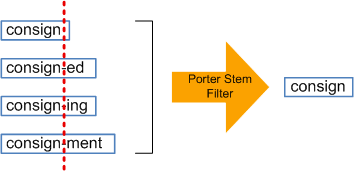

In [55]:

Image("https://leanjavaengineering.files.wordpress.com/2012/02/figure3.png")

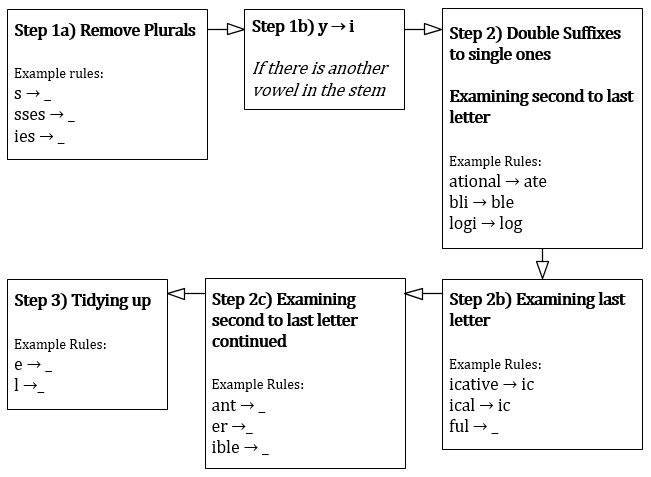

In [68]:
Image("https://carlmorphet.files.wordpress.com/2013/12/porter-stemming-overview.png")

In [63]:
porter = nltk.PorterStemmer()
a=[porter.stem(t) for t in tokens]
print(a[60:90])

['rock', 'by', 'the', 'first', 'great', 'crisi', 'of', 'the', 'new', 'global', 'econom', 'age', '.', 'In', 'Britain', ',', 'the', 'polit', 'crisi', 'caus', 'by', 'expens', 'ha', 'undermin', 'the', 'bond', 'of', 'trust', 'between', 'the']


In [61]:
lancaster = nltk.LancasterStemmer()
a=[lancaster.stem(t) for t in tokens]
print(a[60:90])

['rock', 'by', 'the', 'first', 'gre', 'cris', 'of', 'the', 'new', 'glob', 'econom', 'ag', '.', 'in', 'britain', ',', 'the', 'polit', 'cris', 'caus', 'by', 'expens', 'has', 'undermin', 'the', 'bond', 'of', 'trust', 'between', 'the']


In [67]:
# Snowball es compatible con varios idiomas
snowball = nltk.SnowballStemmer(language="english")
a=[snowball.stem(t) for t in tokens]
print(a[60:90])

['rock', 'by', 'the', 'first', 'great', 'crisi', 'of', 'the', 'new', 'global', 'econom', 'age', '.', 'in', 'britain', ',', 'the', 'polit', 'crisi', 'caus', 'by', 'expens', 'has', 'undermin', 'the', 'bond', 'of', 'trust', 'between', 'the']


In [ ]:
# Ejercicio, 
# Corre el rollbar stemmer en cualquier texto en español que prefieras.

## Lemmatización

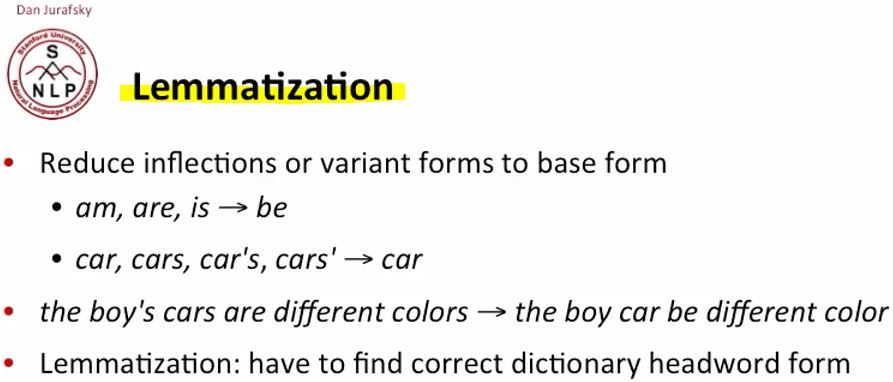

In [71]:
Image("https://franzcalvo.files.wordpress.com/2014/12/lemmatization.jpg")

In [73]:
wnl = nltk.WordNetLemmatizer()
a=[wnl.lemmatize(t) for t in tokens]
print(a[60:90])

['rocked', 'by', 'the', 'first', 'great', 'crisis', 'of', 'the', 'new', 'global', 'economic', 'age', '.', 'In', 'Britain', ',', 'the', 'political', 'crisis', 'caused', 'by', 'expense', 'ha', 'undermined', 'the', 'bond', 'of', 'trust', 'between', 'the']


## Pos Tagging

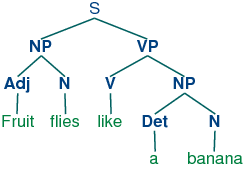

In [98]:
Image("http://nltk.sourceforge.net/doc/en/tree_images/ch03-tree-1.png")

In [101]:
nltk.pos_tag(tokens[0:20])

[('#', '#'),
 ('Foreword', 'NNP'),
 ('by', 'IN'),
 ('Gordon', 'NNP'),
 ('Brown', 'NNP'),
 ('.', '.'),
 ('This', 'DT'),
 ('General', 'NNP'),
 ('Election', 'NNP'),
 ('is', 'VBZ'),
 ('fought', 'VBN'),
 ('as', 'RB'),
 ('our', 'PRP$'),
 ('troops', 'NNS'),
 ('are', 'VBP'),
 ('bravely', 'RB'),
 ('fighting', 'VBG'),
 ('to', 'TO'),
 ('defend', 'VB'),
 ('the', 'DT')]

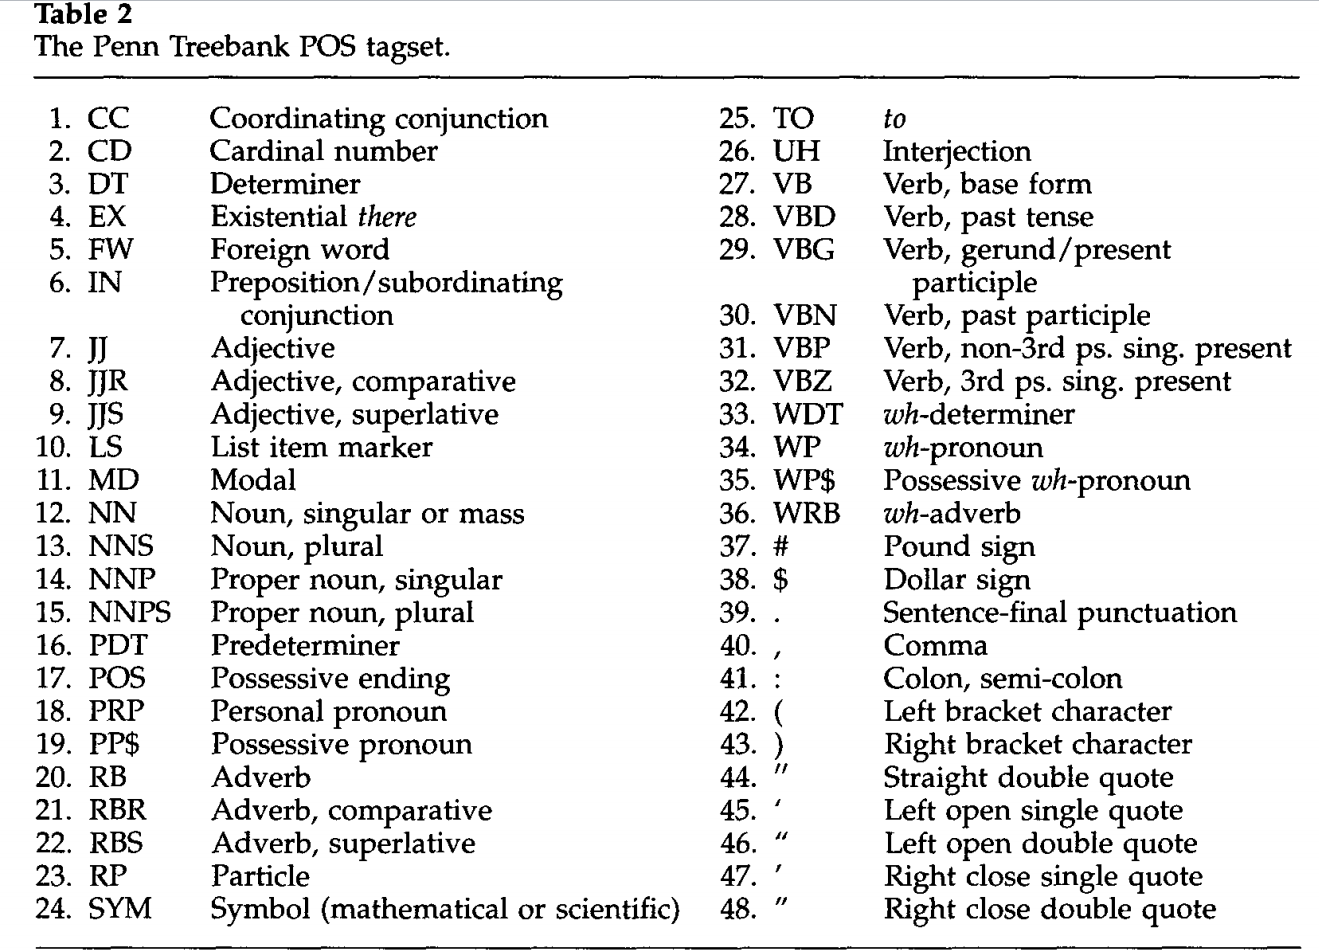

In [102]:
Image("http://3.bp.blogspot.com/-IEOkrijtOZY/UbCcnoX7b_I/AAAAAAAAAEU/lVRN_6jHJA0/s1600/tagset.png")

## Similitud de Palabras

In [74]:
#En el fondo, usa la distancia levenshtein 
nltk.metrics.distance.edit_distance("Pokimon", "Pokémon")

1

In [87]:
nltk.metrics.distance.edit_distance("Wut", "What")

2

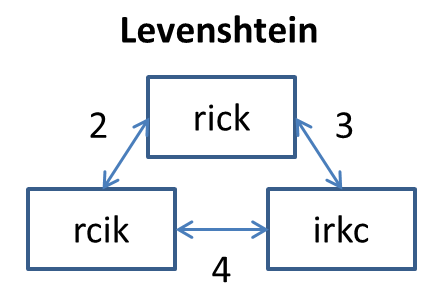

In [80]:
Image("http://richardminerich.com/wp-content/uploads/2012/09/Levenshtein.png")

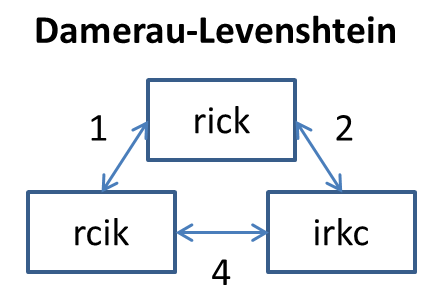

In [81]:
Image("http://richardminerich.com/wp-content/uploads/2012/09/Damerau-Levenshtein.png")

In [88]:
import pyxdameraulevenshtein
print(pyxdameraulevenshtein.damerau_levenshtein_distance("Pokemon", "Pokimon"))
print(pyxdameraulevenshtein.damerau_levenshtein_distance("What", "Wut"))
# Prueba con palabras lo que sucede.

1
2


In [89]:
#Una buena alternativa es usar las versiones normalizadas
print(pyxdameraulevenshtein.normalized_damerau_levenshtein_distance("Pokemon", "Pokimon"))
#Al usar la version normalizada puedes poner un threshold para filtrar palabras.

0.14285714285714285


Se dice que el 80% de los errores de input de humanos vienen de ediciones que pueden ser tratadas con estos métodos, ya que permiten, a cierta medida, tomar dos palabras como la misma. Si la diferencia entre dos palabras no pasa un threshold, puede ser considerado como la misma

# Similitud de textos

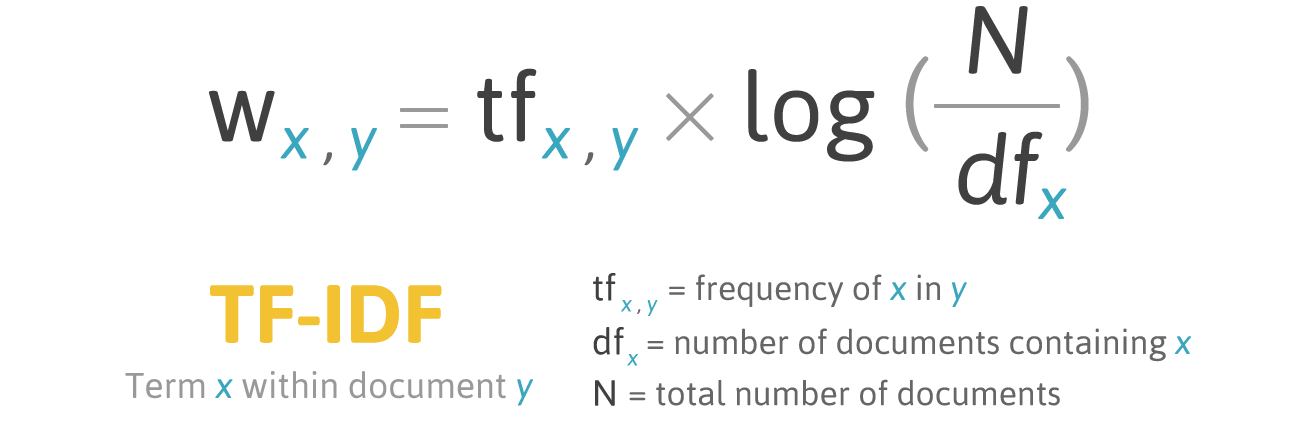

In [94]:
Image("http://3.bp.blogspot.com/-u928a3xbrsw/UukmRVX_JzI/AAAAAAAAAKE/wIhuNmdQb7E/s1600/td-idf-graphic.png")

In [91]:

#frequency–inverse document frequency (td-idf)
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=1)
tfidf = vect.fit_transform(["New Year's Eve in New York",
                            "New Year's Eve in London",
                            "York is closer to London than to New York",
                            "London is closer to Bucharest than to New York"])

In [92]:
print(tfidf)

  (0, 10)	0.34813837273
  (0, 3)	0.430020150596
  (0, 2)	0.430020150596
  (0, 9)	0.430020150596
  (0, 6)	0.569251863129
  (1, 5)	0.400142069674
  (1, 3)	0.49425506218
  (1, 2)	0.49425506218
  (1, 9)	0.49425506218
  (1, 6)	0.327142361372
  (2, 7)	0.30549134241
  (2, 8)	0.61098268482
  (2, 1)	0.30549134241
  (2, 4)	0.30549134241
  (2, 5)	0.247321570122
  (2, 10)	0.494643140245
  (2, 6)	0.202201589385
  (3, 0)	0.394107592857
  (3, 7)	0.310718952978
  (3, 8)	0.621437905956
  (3, 1)	0.310718952978
  (3, 4)	0.310718952978
  (3, 5)	0.251553771413
  (3, 10)	0.251553771413
  (3, 6)	0.205661691257


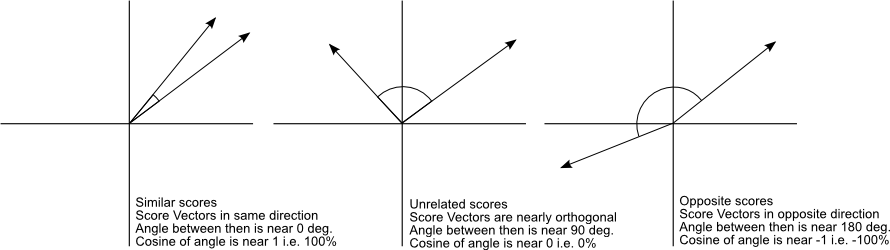

In [97]:
#Distancia coseno.
Image("http://blog.christianperone.com/wp-content/uploads/2013/09/cosinesimilarityfq1.png")

In [96]:
cosine=(tfidf * tfidf.T).A
print(cosine)

[[ 1.          0.82384531  0.28730789  0.20464882]
 [ 0.82384531  1.          0.16511247  0.1679379 ]
 [ 0.28730789  0.16511247  1.          0.89268279]
 [ 0.20464882  0.1679379   0.89268279  1.        ]]


## Aplicaciones

### Análisis de sentimiento usando Clasificación Supervisada (Naive Bayes)

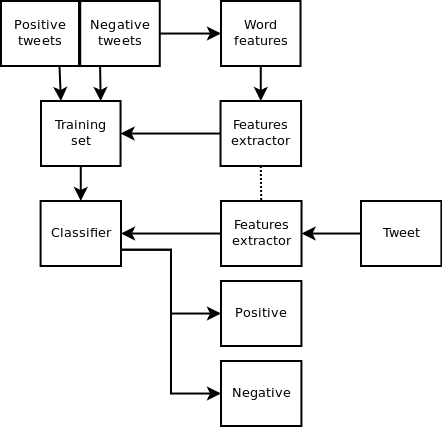

In [103]:
Image("http://www.laurentluce.com/images/blog/nltk/overview.png")

In [104]:
pos_tweets = [('I love this car', 'positive'), ('This view is amazing', 'positive'),('I feel great this morning', 'positive'),('I am so excited about the concert', 'positive'),('He is my best friend', 'positive')]

In [105]:
neg_tweets = [('I do not like this car', 'negative'),('This view is horrible', 'negative'),('I feel tired this morning', 'negative'),('I am not looking forward to the concert', 'negative'),('He is my enemy', 'negative')]

In [107]:
tweets = []
for (words, sentiment) in pos_tweets + neg_tweets:
    words_filtered = [e.lower() for e in words.split() if len(e) >= 3]
    tweets.append((words_filtered, sentiment))

In [108]:
print(tweets)

[(['love', 'this', 'car'], 'positive'), (['this', 'view', 'amazing'], 'positive'), (['feel', 'great', 'this', 'morning'], 'positive'), (['excited', 'about', 'the', 'concert'], 'positive'), (['best', 'friend'], 'positive'), (['not', 'like', 'this', 'car'], 'negative'), (['this', 'view', 'horrible'], 'negative'), (['feel', 'tired', 'this', 'morning'], 'negative'), (['not', 'looking', 'forward', 'the', 'concert'], 'negative'), (['enemy'], 'negative')]


In [109]:
test_tweets = [(['feel', 'happy', 'this', 'morning'], 'positive'),(['larry', 'friend'], 'positive'),(['not', 'like', 'that', 'man'], 'negative'),(['house', 'not', 'great'], 'negative'), (['your', 'song', 'annoying'], 'negative')]

In [118]:
def get_words_in_tweets(tweets):
    all_words = []
    for (words, sentiment) in tweets:
        all_words.extend(words)
    return all_words

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    print(list(wordlist))
    word_features = wordlist.keys()
    return word_features

In [120]:
print("Imprime la FreqDist de wordlist")
word_features = get_word_features(get_words_in_tweets(tweets))
print("Imprime las features")
print(word_features)

Imprime la FreqDist de wordlist
['this', 'enemy', 'car', 'morning', 'horrible', 'view', 'great', 'about', 'best', 'excited', 'amazing', 'tired', 'like', 'not', 'feel', 'forward', 'friend', 'concert', 'looking', 'the', 'love']
Imprime las features
dict_keys(['this', 'enemy', 'car', 'morning', 'horrible', 'view', 'great', 'about', 'best', 'excited', 'amazing', 'tired', 'like', 'not', 'feel', 'forward', 'friend', 'concert', 'looking', 'the', 'love'])


In [121]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [124]:
print(extract_features(['love', 'this', 'car'] ))

{'contains(friend)': False, 'contains(view)': False, 'contains(tired)': False, 'contains(concert)': False, 'contains(about)': False, 'contains(amazing)': False, 'contains(excited)': False, 'contains(not)': False, 'contains(great)': False, 'contains(morning)': False, 'contains(love)': True, 'contains(like)': False, 'contains(enemy)': False, 'contains(car)': True, 'contains(looking)': False, 'contains(forward)': False, 'contains(best)': False, 'contains(the)': False, 'contains(this)': True, 'contains(feel)': False, 'contains(horrible)': False}


In [125]:
training_set = nltk.classify.apply_features(extract_features, tweets)

In [126]:
print(training_set)

[({'contains(friend)': False, 'contains(view)': False, 'contains(tired)': False, 'contains(concert)': False, 'contains(about)': False, 'contains(amazing)': False, 'contains(excited)': False, 'contains(not)': False, 'contains(great)': False, 'contains(morning)': False, 'contains(love)': True, 'contains(like)': False, 'contains(enemy)': False, 'contains(car)': True, 'contains(looking)': False, 'contains(forward)': False, 'contains(best)': False, 'contains(the)': False, 'contains(this)': True, 'contains(feel)': False, 'contains(horrible)': False}, 'positive'), ({'contains(friend)': False, 'contains(view)': True, 'contains(tired)': False, 'contains(concert)': False, 'contains(about)': False, 'contains(amazing)': True, 'contains(excited)': False, 'contains(not)': False, 'contains(great)': False, 'contains(morning)': False, 'contains(love)': False, 'contains(like)': False, 'contains(enemy)': False, 'contains(car)': False, 'contains(looking)': False, 'contains(forward)': False, 'contains(best

In [128]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

```
def train(labeled_featuresets, estimator="ELEProbDist"):
    # Create the P(label) distribution
    label_probdist = estimator(label_freqdist)
    print()
    # Create the P(fval|label, fname) distribution
    feature_probdist = {}
    return NaiveBayesClassifier(label_probdist, feature_probdist)
```

In [133]:
print(classifier.show_most_informative_features(32))

Most Informative Features
           contains(not) = False          positi : negati =      1.6 : 1.0
         contains(about) = False          negati : positi =      1.2 : 1.0
       contains(forward) = False          positi : negati =      1.2 : 1.0
          contains(best) = False          negati : positi =      1.2 : 1.0
       contains(amazing) = False          negati : positi =      1.2 : 1.0
          contains(love) = False          negati : positi =      1.2 : 1.0
         contains(enemy) = False          positi : negati =      1.2 : 1.0
         contains(great) = False          negati : positi =      1.2 : 1.0
         contains(tired) = False          positi : negati =      1.2 : 1.0
       contains(excited) = False          negati : positi =      1.2 : 1.0
        contains(friend) = False          negati : positi =      1.2 : 1.0
       contains(looking) = False          positi : negati =      1.2 : 1.0
          contains(like) = False          positi : negati =      1.2 : 1.0

In [135]:
tweet = 'Larry is my friend'
print(classifier.classify(extract_features(tweet.split())))

positive


In [136]:
print(extract_features(tweet.split()))

{'contains(friend)': True, 'contains(view)': False, 'contains(tired)': False, 'contains(concert)': False, 'contains(about)': False, 'contains(amazing)': False, 'contains(excited)': False, 'contains(not)': False, 'contains(great)': False, 'contains(morning)': False, 'contains(love)': False, 'contains(like)': False, 'contains(enemy)': False, 'contains(car)': False, 'contains(looking)': False, 'contains(forward)': False, 'contains(best)': False, 'contains(the)': False, 'contains(this)': False, 'contains(feel)': False, 'contains(horrible)': False}


Cuando no tenemos twitts preclasificados, usamos un diccionario, que nos permite ponderar si los twitts que usamos para entrenar, para ponderar si un twitt es positivo o negativo.
https://github.com/abcsds/sdal

## Clustering

In [138]:
import numpy
from nltk.cluster import KMeansClusterer, GAAClusterer, euclidean_distance
import nltk.corpus
import nltk.stem
stemmer_func = nltk.stem.snowball.SnowballStemmer("english").stem
stopwords = set(nltk.corpus.stopwords.words('english'))

In [139]:
def normalize_word(word):
    return stemmer_func(word.lower())

In [140]:
def get_words(titles):
    words = set()
    for title in job_titles:
        for word in title.split():
            words.add(normalize_word(word))
    return list(words)

In [141]:
def vectorspaced(title):
    title_components = [normalize_word(word) for word in title.split()]
    return numpy.array([
        word in title_components and not word in stopwords
        for word in words], numpy.short)

In [142]:
title_file = open("example_jobs.txt", 'r')

In [144]:
## Obtener features
job_titles = [line.strip() for line in title_file.readlines()]
words = get_words(job_titles)
words[0:10]

['&',
 'epidemiologist',
 'finance/bank',
 'speech-languag',
 'busi',
 'engin',
 'administr',
 'biomed',
 'programm',
 'development)']

In [145]:
# K-means clustering: Clustering no-supervisado.
cluster = KMeansClusterer(7, euclidean_distance)
cluster.cluster([vectorspaced(title) for title in job_titles if title])
classified_examples = [cluster.classify(vectorspaced(title)) for title in job_titles]

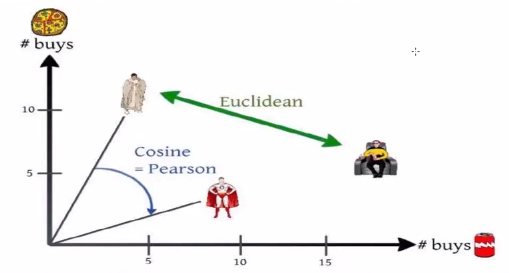

In [149]:
Image("http://www.edureka.co/blog/wp-content/uploads/2014/09/euclidean.png")

In [147]:
for cluster_id, title in sorted(zip(classified_examples, job_titles)):
    print(cluster_id, title)

0 Account Executive
0 Anesthesiologist
0 Assistant Professor
0 Certified Financial Planner
0 Certified Public Accountant
0 Chiropractor
0 Compliance Officer
0 Computer Systems Analyst
0 Construction Estimator
0 ERP Consultant
0 Education/Training Consultant
0 Electrical Estimator
0 Emergency Room Physician
0 Epidemiologist
0 Family Physician
0 Financial Adviser
0 Financial Analyst
0 Financial/Securities/Investments Analyst
0 Healthcare Consultant
0 IT Network Technician
0 IT Security Consultant
0 IT Training Specialist
0 Information Architect
0 Information Technology Consultant
0 Instructional Designer (Training & Development)
0 Internal Auditor
0 Management Consultant
0 Market Research Analyst
0 Marketing Consultant
0 Marriage/Family Therapist
0 Meeting/Convention Planner
0 Nurse, Intensive Care Unit
0 Occupational Therapist
0 Optometrist
0 Orthopedic Surgeon
0 Outside Sales Representative
0 Petroleum Geologist
0 Pharmaceutical Sales Rep
0 Physical Therapist
0 Physician Assistant
0 Pl

In [150]:
# Ejercicio: Modifiquen el numero de clusters y ver como cambian 
# los resultados.

In [151]:
# Ejercicio: Investiga sobre el metodo de group average agglomerative clustering 
# con n classes e Impleméntalo en este proceso.

# Tópico: Extracción de Features de Sonido
http://www.ifs.tuwien.ac.at/~schindler/lectures/MIR_Feature_Extraction.html
http://musicinformationretrieval.com/